# Решающее дерево (Decision tree) Машинное обучение

In [1]:
#Решающее дерево, это один из методов машинного обучения
#Библиотека scikit-learn, которая позволяет реализовывать модели машинного обучения, не только решающие деревья

In [2]:
#Решающие деревья - метод машинного обучения, который неплохо показывает себя при решениях задач связанных с классификацией
#и регрессией
#Процесс классификации представляется в виде набора логических правил(True, False), из которых система строит логическое дерево
#Непонятно, как логическое дерево определяет логические правила

In [3]:
#В случае определения являются ли письма спамом или нет, исходные данные представляют собой текст. Его так просто не запихнёшь 
#в большинство моделей и для представления датасэта как множества точек нужны предварительные преобразования. Как вариант  
#посчитать число букв и число восклицательных знаков в каждом письме и уже на основании этих данных произвести визуализацию

In [4]:
#Зачем нужны решающие деревья?
#У регрессионной модели есть много ограничений, и в ситуациях, когда мы решаем задачи, где нет линейной зависимости
#линейные регрессии показывают себя плохо, поэтому мы используем другие методы, которые свободны от ограничений,
#Например решающие деревья

In [5]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Работа решающего дерева на простом примере

In [6]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [7]:
#Наша задача научиться предсказывать значение переменной y на основе переменных x_1 и x_2

In [8]:
#Создаем дерево
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
X = data[['X_1', 'X_2']] #данные, которые мы используем для обучения представляются ввиде массива/датафрейма/numpy array
y = data.Y #а предсказываемая переменная ввиде вектора

In [10]:
clf.fit(X, y) #обучаем дерево решений 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#Визуализируем дерево, чтобы понять как оно работает

In [12]:
#import sys 
#!conda install -c anaconda graphviz python-graphviz
#установка graphviz

In [13]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [14]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

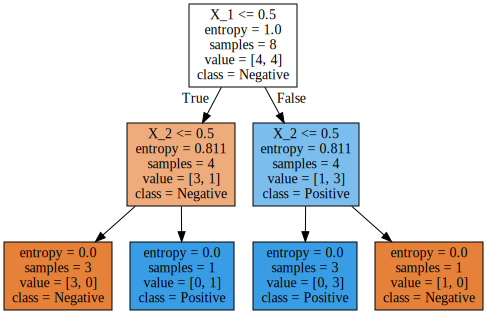

In [15]:
#визуализация дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [16]:
#Как дерево выбирает где делать split
#Задача угадать предсказываему переменную, задав наименьшее число вопросов
#Нужно задавать такие вопросы, которые отсекут часть наблюдений
#Наше дерево задает вопрос X<=0.5, который максимально снижает степень неопределенности (энтропию)

# Entropy reduction и Information gain

In [17]:
#Математическая идея решающего дерева
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [18]:
#Когда мы угадываем без каких-либо уточнений, какое-то значение, то мы находимся в зоне максимальной неопределенности
#Задавая дополнительные вопросы мы снижаем степень неопределенности
#1)В наших данных у нас есть изначально переменные y - 11110000, и полная неопределенность
#2)Формула энтропии E = summ(-pi*log2(pi)), в нашем случае энтропия в начале = 1(это максимальная степень неопределенности)
#если бы у нас все y были одинаковые, тогда вероятность одного исхода будет равна 0,а второго 1, тогда E=0*log2(0)+1*log2(1)=0 
#Чем больше преобладает один из классов, тем ближе энтропия к нулю
#3)так как X_2 у нас распределена как 00010001 и y 11110000, то при вопросе X_2>1/2 у нас энтропия не уменьшится
#Ey(X_2) = -1/2*log2(1/2) - 1/2*log2(1/2) = 1/2+1/2 = 1
#в то время, как Х_1 распределена как 11100001 -Задаем вопрос X_1 >1/2 => Eу(X_1 >1/2) = -1/4*log2(1/4)-3/4*log2(3/4) = 0.81
#Энтропия уменьшается
#4)IG = E0-E(y|x),где IG - снижение энтропии(information gain), E(y|x) = n2/N*Ey1 + n1/N*Ey2
#IG(x_2) = 1-(6/8*1+2/8*1) = 0
#IG(x_1) = 1-(4/8*0.81+4/8*0.81) = 0.19
#5)Теперь разбиваем по X_2>1/2 совместно с X_1>1/2
#X_1>1/2 -> (False) y =1000             X_1>1/2 -> (True) -> y =1110
#X_2>1/2 -> (False) -> y= 000 (True) -> y= 1        X_2>1/2 -> (False)-> y = 111 (True) -> y =0 
#Основная идея: у нас есть фичи и переменная y(которую мы предсказываем)
#Дерево решений ищет ищет переменную, по которой можно сделать split с максимальным IG(понижение энтропии)
#Этот алгоритм повтрояется до тех пор пока энтропия не станет равной 0, после чего алгоритм завершается

In [40]:
dogs = pd.read_csv('dogs.csv', index_col=0)
dogs

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [30]:
X = dogs[['Unnamed: 0', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = dogs['Вид']

In [32]:
clf.fit(X, y) #обучаем дерево решений 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
cats = pd.read_csv('cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [57]:
#Расчет энтропий
import numpy as np
E_sherstist_0 = 0
E_sherstist_1 = -0.44*np.log2(0.44)-0.55*np.log2(0.55)
E_gavkaet_0 = 0
E_gavkaet_1 = -4/5*np.log2(4/5)-1/5*np.log2(1/5)
E_lazet_0 = 0
E_lazet_1 = 0
E_0 = -0.4*np.log2(0.4)-0.6*np.log2(0.6)

In [58]:
print(E_sherstist_0,
E_sherstist_1,
E_gavkaet_0,
E_gavkaet_1,
E_lazet_0,
E_lazet_1,
E_0)

0 0.995519873238004 0 0.7219280948873623 0 0 0.9709505944546686


In [59]:
IG_sherstist = 0.9709505944546686 -0.99*0.9
IG_gavkaet = 0.9709505944546686 - 0.72*0.5
IG_Lazaet = 0.9709505944546686 - 0

In [60]:
print(IG_sherstist,
IG_gavkaet,
IG_Lazaet)

0.07995059445466857 0.6109505944546686 0.9709505944546686


In [ ]:
#Если энтропия Y после сплита по какой-либо фиче не изменилась, то IG(фичи) = 0
#Если энтропия Y после сплита по какой-либо фиче стала равной 0, то IG(по фиче) - максимален

In [ ]:
#Материал для повторения алгоритма обучения дерева.
#https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8
#Наглядное введение в теорию машинного обучения
#http://www.r2d3.us/%D0%9D%D0%B0%D0%B3%D0%BB%D1%8F%D0%B4%D0%BD%D0%BE%D0%B5-%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8E-%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE-%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F/

In [ ]:
#Основные понятия  по теме дерево решений
#Entropy and Information gain 
# Train / test split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# K-fold cross-validation - https://scikit-learn.org/stable/modules/cross_validation.html
#Hyper parameters and Grid search  - https://scikit-learn.org/stable/modules/grid_search.html


In [ ]:
#1.Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. 
#В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять 
#исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.
#2. Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться 
#и другие критерии.
#3. По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, 
#классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может 
#приводить к переобучению в результате избыточной глубины дерева.
#4.Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели 
#на тестовой выборке. Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, 
#т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях 
#в конкретной выборке.
#5. Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина 
#дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.
#6.В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке 
#разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 
#5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.